In [1]:
import datetime # date and time tools

import os, sys

import math

import random

import numpy as np
from scipy import stats
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import episiming

## Criando o cenário do Rio com redução

In [3]:
tx_reducao = 500
landscan_file = '../../../../dados/RJ/cidade_rj/dados_estatisticos/LandScan.npy'
piramide_file = 'piramide_etaria_MRJ.csv'
escolas_file = 'municipais.npy'
cenario_rio = episiming.cenarios.RiodeJaneiro(tx_reducao, landscan_file, piramide_file, escolas_file)
print(f'População do cenário reduzido: {cenario_rio.num_pop}\n')

População do cenário reduzido: 13163



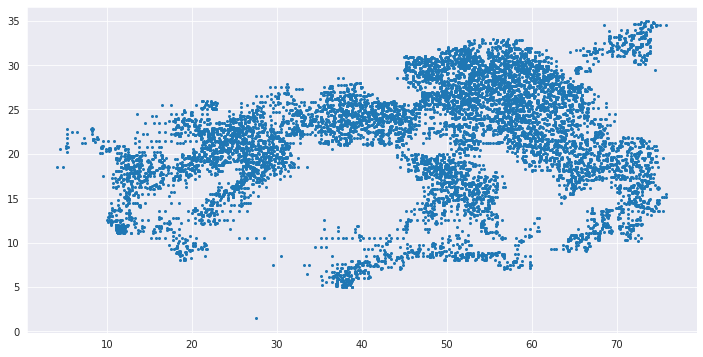

In [4]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(12,6))
plt.scatter(x, y, s=4)
plt.show()

## Carregando as informações de infectados por blocos

In [25]:
infect = np.load('infectados_total.npy')

In [6]:
new_infect = np.zeros(np.shape(infect))

In [7]:
def corrige_mtrx(mtrx):
    new_mtrx = np.zeros(np.shape(mtrx))
    for i in range(39):
        new_mtrx[np.abs(i-38)] = mtrx[i]
    return new_mtrx

In [8]:
bairros = np.load('geoloc_Bairros_MRJ.npy')

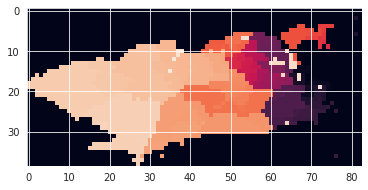

In [9]:
plt.imshow(bairros)

In [10]:
new_bairros = corrige_mtrx(bairros)

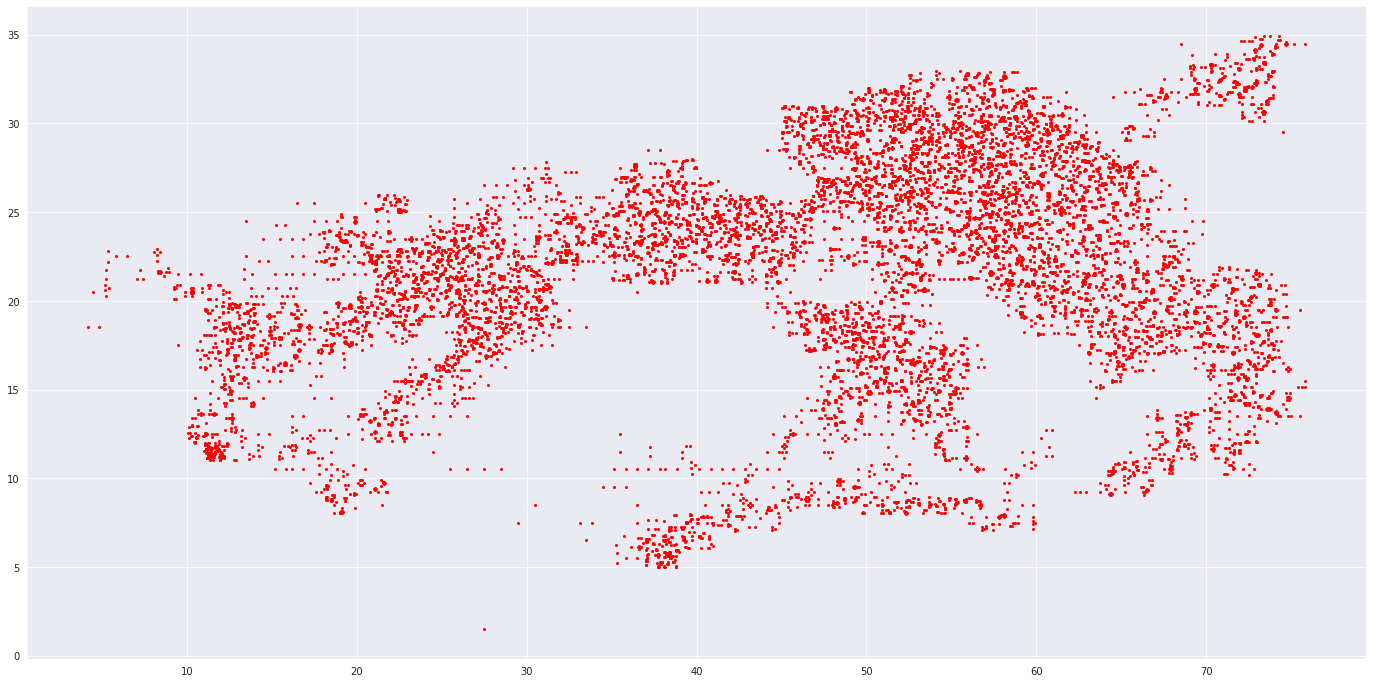

In [11]:
x, y = cenario_rio.pop_posicoes.T
plt.figure(figsize=(24,12))
plt.scatter(x, y, s=4, color = 'red')
# plt.imshow(new_infect)
# plt.gca().invert_yaxis()
plt.show()

In [12]:
pos_indv_blocos = np.ceil(cenario_rio.pop_posicoes)

In [13]:
mtrx_infectados_reduzida = np.ceil(infect/tx_reducao)

Usando numpy

In [16]:
infect = []
rng = np.arange(len(pos_indv_blocos))
for x in range(83):
    for y in range(39):
        checa_bloco_indv = pos_indv_blocos == [x,y]
        indv_nos_blocos = np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
        indices_no_bloco = rng[indv_nos_blocos]
        qt_bloco = mtrx_infectados_reduzida[y,x]                  
        if (qt_bloco > 0) & (len(indices_no_bloco) > 0):
            indv_infect = np.random.choice(indices_no_bloco, int(qt_bloco))
            for e in indv_infect:
                infect.append(e)

List Comprehension

In [82]:
# %%timeit
# for x in range(83):
#     for y in range(39):
#         check_pos = pos_blocos == [x,y]
#         verifica = [p[0] & p[1] for p in check_pos]
#         indices = rng[verifica]
#         qt = new_infect2[y,x]
#         if (qt > 0) & (len(indices) > 0):
#             escolhas = np.random.choice(indices, int(qt))
#             for e in escolhas:
#                 cenario_rio.G_r.nodes[e]['estado'] = 2

11.4 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
# np.sum(np.hstack(teste2))

86625703

In [62]:
# np.sum(np.hstack(teste))

86625703

In [21]:
infectados = np.array([v for i,v in nx.get_node_attributes(cenario_rio.G_r,'estado').items()])

In [24]:
infectados

array([1, 2, 1, ..., 1, 1, 1])

In [28]:
num_infectados_0 = 500
num_pop = 10000

In [29]:
pop_estado_0 = np.ones(num_pop)
infectados_0 = np.random.choice(num_pop,num_infectados_0, replace=False)
pop_estado_0[infectados_0] = 2*np.ones(num_infectados_0)
attr_estado_0 = dict([(i, {'estado': int(pop_estado_0[i])}) for i in range(num_pop)])


In [30]:
def corrige_mtrx(mtrx):
        new_mtrx = np.zeros(np.shape(mtrx))
        for i in range(39):
            new_mtrx[np.abs(i-38)] = mtrx[i]
        return new_mtrx

def distribuicao_inicial_infectados(tx_reducao, mtrx_infectados, mtrx_bairros, pop_posicoes):

    mtrx_infectados = corrige_mtrx(mtrx_infectados)
    mtrx_bairros = corrige_mtrx(mtrx_bairros)

    pos_indv_blocos = np.ceil(pop_posicoes)
    mtrx_infectados_reduzidas = np.ceil(mtrx_infectados/tx_reducao)

    infect = []
    rng = np.arange(len(pos_indv_blocos))
    for x in range(83):
        for y in range(39):
            checa_bloco_indv = pos_indv_blocos == [x,y]
            indv_nos_blocos = np.logical_and(checa_bloco_indv[:,0], checa_bloco_indv[:,1])
            indices_no_bloco = rng[indv_nos_blocos]
            qt_bloco = mtrx_infectados_reduzida[y,x]                  
            if (qt_bloco > 0) & (len(indices_no_bloco) > 0):
                indv_infect = np.random.choice(indices_no_bloco, int(qt_bloco))
                for e in indv_infect:
                    infect.append(e)
    return infect

In [33]:
infectados_0 = distribuicao_inicial_infectados(500, infect, bairros, cenario_rio.pop_posicoes)

In [38]:
pop_estado_0 = np.ones(60000)

In [47]:
min(infectados_0)

1156

In [41]:
attr_estado_0 = dict([(i, {'estado': int(pop_estado_0[i])})for i in range(60000)])

In [48]:
attr_estado_0[1156]

{'estado': 2}